In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models , Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
(X_train,y_train), (X_test,y_test)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
cv2_imshow(X_train[0])

In [26]:
X_test_train= np.expand_dims(X_train,-1)
X_test= np.expand_dims(X_test, -1)

In [36]:
inputs= Input(shape= (28,28,1), name= 'input_layer')

x=layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',name='conv1')(inputs)
x=layers.MaxPooling2D((2,2), name= 'pooling1')(x)
x=layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',name='conv2')(x)
x=layers.MaxPooling2D((2,2), name= 'pooling2')(x)



x= layers.Flatten(name='flatten_layer')(x)
x=layers.Dense(128,activation='relu', name= 'dense_relu')(x)
x=layers.Dropout(0.3, name= 'dropout_layer')(x)

outputs= layers.Dense(10,activation= 'softmax', name= 'output_layer')(x)


model= models.Model(inputs= inputs, outputs= outputs, name= 'fashion_mnist_model')

In [37]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])



In [38]:

model.summary()

Model: "fashion_mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling1 (MaxPooling2D)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling2 (MaxPooling2D)         │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_relu (Dense)              │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

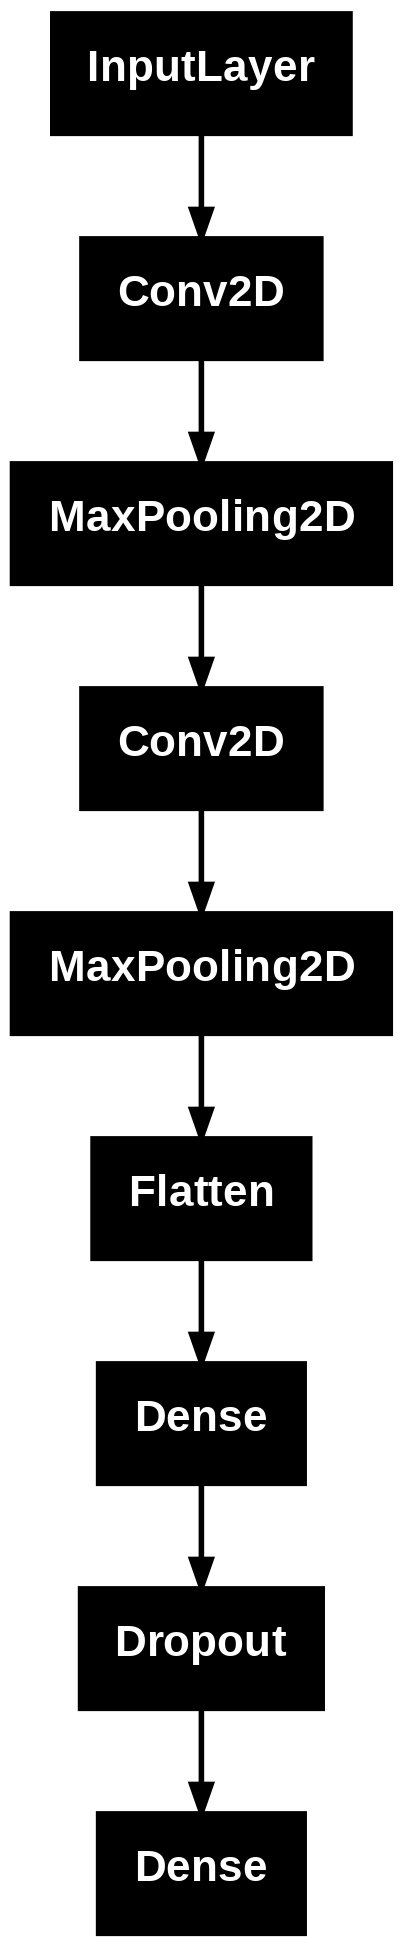

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [40]:
history= model.fit(X_train,y_train, epochs=10, batch_size=64,validation_data= (X_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7427 - loss: 1.5726 - val_accuracy: 0.8672 - val_loss: 0.3668
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8641 - loss: 0.3708 - val_accuracy: 0.8790 - val_loss: 0.3357
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8876 - loss: 0.3134 - val_accuracy: 0.8939 - val_loss: 0.3027
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8975 - loss: 0.2787 - val_accuracy: 0.9010 - val_loss: 0.2858
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9070 - loss: 0.2513 - val_accuracy: 0.9024 - val_loss: 0.2757
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9130 - loss: 0.2367 - val_accuracy: 0.9038 - val_loss: 0.2834
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9158 - loss: 0.2227 - val_accuracy: 0.9060 - val_loss: 0.2604
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9218 - loss: 0.2068 - val_accuracy: 0

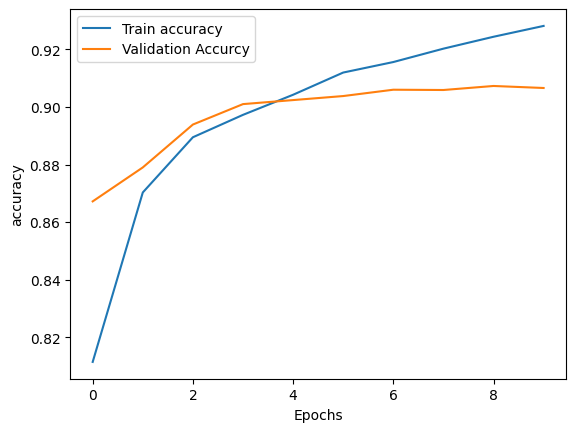

In [41]:
plt.plot(history.history['accuracy'], label= 'Train accuracy')
plt.plot(history.history['val_accuracy'],label= 'Validation Accurcy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)